### The scope of this project is to analyze developer survey data from StackOverflow over the last 2 years. These insights will be key to guide an upcoming web development company in order to start hiring the teams necessary to build it's infrastructure and upcoming products.

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load surveys and schemas for 2020 and 2021 datasets
df_2020_survey = pd.read_csv('./stack-overflow-developer-survey-2020/survey_results_public.csv')
df_2020_schema = pd.read_csv('./stack-overflow-developer-survey-2020/survey_results_schema.csv')
df_2021_survey = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_public.csv')
df_2021_schema = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_schema.csv')

In [179]:
# we take a quick look at the 2020 survey data
df_2020_survey

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [180]:
# we take a quick look at schema of the 2020 data
df_2020_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [181]:
# we take a quick look at the 2021 survey data
df_2021_survey

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [182]:
# we take a quick look at schema of the 2021 data
df_2021_schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


### Looking at the data of the two years we notice that the two datasets do not have the same columns, meaning that different questions have been asked in the year following 2020. Here we explore the new naming and details that are present in the 2021 schema and also if there is any way to merge the two datasets

In [183]:
# Tying the 2020 survey data columns  with the schema is the 'Column' column in the schema dataframe.
# There is no column in the 2020 survey dataset that doesn't correspond to a 'QuestionText' in the schema
print(df_2020_schema.columns)
print(df_2020_survey.columns)

Index(['Column', 'QuestionText'], dtype='object')
Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Tran

In [184]:
# Tying the schema to the 2021 dataset  is the 'qname' column
print(df_2021_schema.columns)
print(df_2021_survey.columns)

Index(['qid', 'qname', 'question', 'force_resp', 'type', 'selector'], dtype='object')
Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedComp

In [185]:
# Some columns in the survey dataset for 2021 do not exist in the schema
# In this case we can either infer from the naming  what  the column  means  or discard columns that don't make sense to us

column_absent_from_schema = []
for i in range(0,len(df_2021_survey.columns)):
    if df_2021_survey.columns[i] not in list(df_2021_schema.qname):
        column_absent_from_schema.append(df_2021_survey.columns[i])
        print(df_2021_survey.columns[i])

print('\n --------------------')

# some questions in the schema are not  existent in the survey data columns so we can discard those
qname_absent_from_dataset = []
for i in range(0,len(list(df_2021_schema.qname))):
    if list(df_2021_schema.qname)[i] not in list(df_2021_survey.columns):
        print(list(df_2021_schema.qname)[i])
        qname_absent_from_dataset.append(i)

# delete df_2021_schema rows where 'qname' is not existent in the survey dataset
df_2021_schema.drop(qname_absent_from_dataset, axis=0, inplace=True)

ResponseId
LanguageHaveWorkedWith
LanguageWantToWorkWith
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
PlatformHaveWorkedWith
PlatformWantToWorkWith
WebframeHaveWorkedWith
WebframeWantToWorkWith
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
ConvertedCompYearly

 --------------------
S0
MetaInfo
S1
S2
S3
Language
Database
Platform
Webframe
MiscTech
ToolsTech
NEWCollabTools
S4
NEWOtherCommsNames
S5
S6


### The following column names from the 2021 survey dataset do not exist in the schema. Below I have tried to explain them to myself from the naming. Later when  looking at the answers for each of these columns we can decide if they are used or not.

ResponseId - This is a unique identifier for a specific user survey.

LanguageHaveWorkedWith - Represents the language (or languages?) that the user has worked with.

LanguageWantToWorkWith - Represents the language (or languages?) that the user wants to work with.

DatabaseHaveWorkedWith - Represents the database (or databases?) that the user has worked with.

DatabaseWantToWorkWith - Represents the database (or databases?) that the user wants to work with.

PlatformHaveWorkedWith - Represents the platform (or platforms?) that the user has worked with.

PlatformWantToWorkWith - Represents the platform (or platforms?) that the user wants to work with.

WebframeHaveWorkedWith - Represents the webframe (or webframes?) that the user has worked with.

WebframeWantToWorkWith - Represents the webframe (or webframes?) that the user wants to work with.

MiscTechHaveWorkedWith - Represents miscellaneous technologies that the user has worked with.

MiscTechWantToWorkWith - Represents miscellaneous technologies that the user wants to work with.

ToolsTechHaveWorkedWith - Represents tech tools that the user has worked with.

ToolsTechWantToWorkWith - Represents tech tools that the user wants to work with.

NEWCollabToolsHaveWorkedWith - Represents new collaboration tools that the user has worked with.

NEWCollabToolsWantToWorkWith - Represents new collaboration tools that the user wants to work with.

ConvertedCompYearly - Represents .

In [186]:
# The schema for the 2021 dataset contains 3 additional columns which provide insight into the format of each question.
# Below I found explanations for the 'force_resp', 'type' and 'selector' values

# from google:
# Forced choice survey questions makes survey respondents choose a response option that indicates a definitive opinion. These questions eliminate Don't Know and Neutral response options, because they are designed to force respondents to express an opinion or attitude.
print(df_2021_schema.force_resp.value_counts(), '\n', '-------')

# from: https://gist.github.com/ctesta01/d4255959dace01431fb90618d1e8c241#breakdown-of-question-structure
# The QuestionType contains a short code which describes which of the basic categories of questions this question falls into. These can be "MC", "TE", "DB", "Matrix", "SBS", "DD", and others. It is my guess that these stand for respectively: "Multiple Choice", "Text Entry", "Descriptive Box", "Matrix", "Side-by-Side", "Drop-Down", etc.
print(df_2021_schema.type.value_counts(), '\n', '-------')

# from https://gist.github.com/ctesta01/d4255959dace01431fb90618d1e8c241#breakdown-of-question-structure :
# The Selector describes what interface the respondent uses to make their response to the question. These range from things like "MAVR", "TE", "Likert", "SAVR", "TB", and more. These abbreviations stand for "Multiple Answer Vertical", "Text Entry", "Likert", "Single Answer Vertical", "Text-Box", etc. "
# from google:
# Likert - It's a question that uses a 5 or 7-point scale, sometimes referred to as a satisfaction scale, that ranges from one extreme attitude to another. Typically, the Likert survey question includes a moderate or neutral option in its scale.
print(df_2021_schema.selector.value_counts(), '\n', '-------')

False    29
True      3
Name: force_resp, dtype: int64 
 -------
MC    31
TE     1
Name: type, dtype: int64 
 -------
MAVR    22
DL       5
SAVR     3
SB       1
SL       1
Name: selector, dtype: int64 
 -------


In [187]:
# Looking at the question values in the schema we notice some html tags. Using the BeautifulSoup library we strip out the html tags
from bs4 import BeautifulSoup

def clean_html(rawText):
    soup = BeautifulSoup(rawText, "html.parser")
    return soup.get_text()


df_2021_schema['question'] =  df_2021_schema['question'].apply(lambda cell: clean_html(cell))

In [188]:
# Now we are going to create a function that will get column descriptions from the columns of the survey datasets.
# This is an upgraded function to the one in the course because based on additional parameters it will adapt to the new schema
# structure of the 2021 dataset  and it will also retrieve the additional details each  question has in the new dataset

def get_description(column_name, isPrecedentYear=False, schema_2021=df_2021_schema, schema_2020=df_2020_schema):
    """
    INPUT - schema_2020 - pandas dataframe with the schema of the developers survey for year 2020
    INPUT - schema_2021 - pandas dataframe with the schema of the developers survey for year 2021
            column_name - string - the name of the column you would like to know about
            isPrecedentYear - boolean - to specifically ask for the description of the 2020 dataset
    OUTPUT -
            desc - string - the description of the column
            force_resp - string - wether it was a forced response or freeform
            type - string - describes the basic category of the question
            selector - string - type of interface used for the question
    """

    # check if the column partains to one of the datasets
    is2021Dataset = (column_name in list(schema_2021.qname)) and not isPrecedentYear
    is2020Dataset = column_name in list(schema_2020.Column)

    if not (is2021Dataset or is2020Dataset):
        return 'no description' #None

    # below if statements look for the column name among the 'qname' or 'Column' schema columns and retrieve the description and/or additional information
    if is2021Dataset:
        return list(df_2021_schema[df_2021_schema['qname'] == column_name][['question', 'force_resp', 'type', 'selector']].values[0])

    if(is2020Dataset):
        return list(schema_2020[schema_2020['Column'] == column_name]['QuestionText'])[0], None, None, None

get_description(df_2020_survey.columns[1], True)

('Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."',
 None,
 None,
 None)

In [230]:
# Now we make the intersection and difference between the columns of each dataset
column_common = list(set(df_2020_survey.columns).intersection(set(df_2021_survey.columns)))
column_diff_2020 = list(set(df_2020_survey.columns).difference(set(df_2021_survey.columns))) # in 2020 but not in the other
column_diff_2021 = list(set(df_2021_survey.columns).difference(set(df_2020_survey.columns))) # in 2021 but not in the other
column_common

['CompTotal',
 'Ethnicity',
 'Age1stCode',
 'SurveyEase',
 'Country',
 'YearsCode',
 'mobile',
 'SurveyLength',
 'SOPartFreq',
 'DevType',
 'MainBranch',
 'back-end',
 'SOVisitFreq',
 'data',
 'Sexuality',
 'devops',
 'Gender',
 'front-end',
 'ConvertedCompYearly',
 'CompFreq',
 'Age',
 'NEWSOSites',
 'Year',
 'full-stack',
 'EdLevel',
 'YearsCodePro',
 'NEWOtherComms',
 'Employment',
 'Trans',
 'NEWStuck',
 'SOComm',
 'OpSys',
 'SOAccount',
 'OrgSize']

In [190]:
#  Check the descriptions for common columns have roughly the same definition
for i in range(0, len(column_common)):
    print(get_description(column_common[i]), column_common[i])

print("### \n")

for i in range(0, len(column_common)):
    print(get_description(column_common[i], True))

['What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in ${q://QID50/ChoiceGroup/SelectedChoicesTextEntry}? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.', False, 'TE', 'SL'] CompTotal
['Which of the following describe you, if any? Please check all that apply.', False, 'MC', 'MAVR'] Ethnicity
['At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project) ', False, 'MC', 'MAVR'] Age1stCode
['How easy or difficult was this survey to complete?', False, 'MC', 'MAVR'] SurveyEase
['Where do you live? *', True, 'MC', 'DL'] Country
['Including any education, how many years have you been coding in total?', False, 'MC', 'DL'] YearsCode
['How do you feel about the length of the survey this year?', False, 'MC', 'MAVR'] SurveyLength
['How

In [191]:
# Look through the descriptions  of common  columns  and pick only the one that are of interest to us
column_common_interest = ['MainBranch', 'EdLevel', 'OpSys', 'YearsCode', 'Employment', 'Country', 'Age1stCode',
                          'NEWOtherComms', 'OrgSize', 'NEWStuck', 'CompTotal', 'CompFreq', 'Age', 'YearsCodePro',
                          'DevType']

## After understanding the data I decide to look at the values of the common columns of interest in both dataset and standardise where needed. The values in some cases might not be the compatible. This is done in order to concatenate rows from each dataset into a bigger one.

In [192]:
# check dtypes for common columns that are of interest to us
print(df_2020_survey[column_common_interest].dtypes, '\n')
print(df_2021_survey[column_common_interest].dtypes)
# create a common column for the year
df_2021_survey['Year'] = 2021
df_2020_survey['Year'] = 2020
# Change dtype of Age column in both datasets to string in order to merge them
df_2021_survey['Age'] = df_2021_survey['Age'].astype('string')
df_2020_survey['Age'] = df_2020_survey['Age'].astype('string')
# Change dtype of DevType column in both datasets to string in order to make operations on it
df_2021_survey['DevType'] = df_2021_survey['DevType'].astype('string')
df_2020_survey['DevType'] = df_2020_survey['DevType'].astype('string')

MainBranch        object
EdLevel           object
OpSys             object
YearsCode         object
Employment        object
Country           object
Age1stCode        object
NEWOtherComms     object
OrgSize           object
NEWStuck          object
CompTotal        float64
CompFreq          object
Age              float64
YearsCodePro      object
DevType           object
dtype: object 

MainBranch        object
EdLevel           object
OpSys             object
YearsCode         object
Employment        object
Country           object
Age1stCode        object
NEWOtherComms     object
OrgSize           object
NEWStuck          object
CompTotal        float64
CompFreq          object
Age               object
YearsCodePro      object
DevType           object
dtype: object


## The DevType column contains a string for each response containing multiple mostly standardised answers. These categorical values will need to be split into multiple boolean values after we parse each string. We will look only to create columns for the developer types we are looking for. These are:
- Front End
- Back End
- Full-Stack
- Data Scientists
- Dev Ops
- Mobile

In [193]:
# starting with 2021

# remove nan values
df_2021_survey.dropna(subset=['DevType'], inplace=True)
# remove useless strings
df_2021_survey.DevType = df_2021_survey.DevType.str.replace('Developer, ', '')
df_2021_survey.DevType = df_2021_survey.DevType.str.replace('Other ', '')
df_2021_survey.DevType = df_2021_survey.DevType.str.replace('(please specify)', '')
df_2021_survey.DevType = df_2021_survey.DevType.str.replace('(', '')
df_2021_survey.DevType = df_2021_survey.DevType.str.replace(')', '')
# standardise separators
df_2021_survey.DevType = df_2021_survey.DevType.str.replace(':', '')
df_2021_survey.DevType = df_2021_survey.DevType.str.replace(',', ';')
df_2021_survey.DevType = df_2021_survey.DevType.str.replace(' or', ';')
# remove spaces
df_2021_survey.DevType = df_2021_survey.DevType.str.replace(' ', '')
# lowercase everything
df_2021_survey.DevType = df_2021_survey.DevType.str.lower()
# split on main separator
df_2021_survey.DevType = df_2021_survey.DevType.str.split(';')

<ipython-input-193-7b2ea6ef5dc6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2021_survey.DevType = df_2021_survey.DevType.str.replace('(please specify)', '')
<ipython-input-193-7b2ea6ef5dc6>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_2021_survey.DevType = df_2021_survey.DevType.str.replace('(', '')
<ipython-input-193-7b2ea6ef5dc6>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_2021_survey.DevType = df_2021_survey.DevType.str.replace(')', '')


In [194]:
# create columns out for each desired section: 'front-end', 'full-stack', 'back-end', 'data scientist', 'mobile', 'devops'
df_2021_survey['front-end'] = 0
df_2021_survey['full-stack'] = 0
df_2021_survey['back-end'] = 0
df_2021_survey['data'] = 0
df_2021_survey['mobile'] = 0
df_2021_survey['devops'] = 0

for i, val in df_2021_survey.iterrows():
    if 'front-end' in val.DevType:
        df_2021_survey.at[i, 'front-end'] = 1
    if 'full-stack' in val.DevType:
        df_2021_survey.at[i, 'full-stack'] = 1
    if 'back-end' in val.DevType:
        df_2021_survey.at[i, 'back-end'] = 1
    if 'datascientist' in val.DevType:
        df_2021_survey.at[i, 'data'] = 1
    if 'devopsspecialist' in val.DevType:
        df_2021_survey.at[i, 'devops'] = 1
    if 'mobile' in val.DevType:
        df_2021_survey.at[i, 'mobile'] = 1

In [195]:
# check values
print(df_2021_survey[['devops']].value_counts())
print(df_2021_survey[['data']].value_counts())
print(df_2021_survey[['front-end']].value_counts())
print(df_2021_survey[['full-stack']].value_counts())
print(df_2021_survey[['back-end']].value_counts())
print(df_2021_survey[['mobile']].value_counts())

devops
0         59426
1          7058
dtype: int64
data
0       62211
1        4273
dtype: int64
front-end
0            48253
1            18231
dtype: int64
full-stack
0             33593
1             32891
dtype: int64
back-end
0           37413
1           29071
dtype: int64
mobile
0         56684
1          9800
dtype: int64


In [196]:
# and continuing with df_2020_survey

# remove nan values
df_2020_survey.dropna(subset=['DevType'], inplace=True)
# # remove useless strings
df_2020_survey.DevType = df_2020_survey.DevType.str.replace('Developer, ', '')
df_2020_survey.DevType = df_2020_survey.DevType.str.replace('Other ', '')
df_2020_survey.DevType = df_2020_survey.DevType.str.replace('(please specify)', '')
df_2020_survey.DevType = df_2020_survey.DevType.str.replace('(', '')
df_2020_survey.DevType = df_2020_survey.DevType.str.replace(')', '')
# standardise separators
df_2020_survey.DevType = df_2020_survey.DevType.str.replace(':', '')
df_2020_survey.DevType = df_2020_survey.DevType.str.replace(',', ';')
df_2020_survey.DevType = df_2020_survey.DevType.str.replace(' or', ';')
# remove spaces
df_2020_survey.DevType = df_2020_survey.DevType.str.replace(' ', '')
# lowercase everything
df_2020_survey.DevType = df_2020_survey.DevType.str.lower()
# split on main separator
df_2020_survey.DevType = df_2020_survey.DevType.str.split(';')

<ipython-input-196-8fe2af0f50cf>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2020_survey.DevType = df_2020_survey.DevType.str.replace('(please specify)', '')
<ipython-input-196-8fe2af0f50cf>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_2020_survey.DevType = df_2020_survey.DevType.str.replace('(', '')
<ipython-input-196-8fe2af0f50cf>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_2020_survey.DevType = df_2020_survey.DevType.str.replace(')', '')


In [197]:
# create columns out for each desired section: 'front-end', 'full-stack', 'back-end', 'data scientist', 'mobile', 'devops'
df_2020_survey['front-end'] = 0
df_2020_survey['full-stack'] = 0
df_2020_survey['back-end'] = 0
df_2020_survey['data'] = 0
df_2020_survey['mobile'] = 0
df_2020_survey['devops'] = 0

for i, val in df_2020_survey.iterrows():
    if 'front-end' in val.DevType:
        df_2020_survey.at[i, 'front-end'] = 1
    if 'full-stack' in val.DevType:
        df_2020_survey.at[i, 'full-stack'] = 1
    if 'back-end' in val.DevType:
        df_2020_survey.at[i, 'back-end'] = 1
    if 'datascientist' in val.DevType:
        df_2020_survey.at[i, 'data'] = 1
    if 'devopsspecialist' in val.DevType:
        df_2020_survey.at[i, 'devops'] = 1
    if 'mobile' in val.DevType:
        df_2020_survey.at[i, 'mobile'] = 1



In [198]:
# check values
print(df_2020_survey[['devops']].value_counts(), "\n -----")
print(df_2020_survey[['data']].value_counts(), "\n -----")
print(df_2020_survey[['full-stack']].value_counts(), "\n -----")
print(df_2020_survey[['front-end']].value_counts(), "\n -----")
print(df_2020_survey[['back-end']].value_counts(), "\n -----")
print(df_2020_survey[['mobile']].value_counts(), "\n -----")

devops
0         43401
1          5969
dtype: int64 
 -----
data
0       45382
1        3988
dtype: int64 
 -----
full-stack
1             27125
0             22245
dtype: int64 
 -----
front-end
0            31074
1            18296
dtype: int64 
 -----
back-end
1           27228
0           22142
dtype: int64 
 -----
mobile
0         39888
1          9482
dtype: int64 
 -----


## Now we take a look at the compensation related columns in each dataset

In [199]:
df_2021_survey.CompTotal # type float
df_2021_survey.CompFreq # 'Monthly', 'Yearly', 'Weekly'
df_2021_survey.ConvertedCompYearly # calculated, no description

# no ConvertedComp column, needs calculated
df_2020_survey.CompTotal # type float
df_2020_survey.CompFreq # 'Monthly', 'Yearly', 'Weekly'

0        Monthly
1            NaN
5            NaN
6        Monthly
7         Yearly
          ...   
64448        NaN
64449        NaN
64451        NaN
64453        NaN
64456        NaN
Name: CompFreq, Length: 49370, dtype: object

## ConvertedCompYearly column does not exist in the 2020 dataset. This needs to be calculated from the CompFreq and CompTotal columns. We create a function for this

In [231]:
def convert_salary(entry):
    if np.isnan(entry.CompTotal) or not isinstance(entry.CompFreq, str):
        return entry.ConvertedCompYearly
    else:
        if entry.CompFreq == "Monthly":
            return 12 * entry.CompTotal

        if entry.CompFreq == "Yearly":
            return entry.ConvertedCompYearly

        if entry.CompFreq == "Weekly":
            52 * entry.CompTotal

        return entry.ConvertedCompYearly

# create the missing column for computed yearly salary
df_2020_survey['ConvertedCompYearly'] = np.nan
# apply the function across every row in the 2020 dataset
df_2020_survey.ConvertedCompYearly = df_2020_survey.apply(lambda row: convert_salary(row), axis=1)
# finally take a look at the data
df_2020_survey.ConvertedCompYearly

0       NaN
1       NaN
5       NaN
6       NaN
7       NaN
         ..
64448   NaN
64449   NaN
64451   NaN
64453   NaN
64456   NaN
Name: ConvertedCompYearly, Length: 49370, dtype: float64

In [201]:
# Quick look at the percentage of reported salaries in both datasets
print("Percentage of inconclusive salaries in the 2020 dataset", df_2020_survey.ConvertedCompYearly.isna().sum() / df_2020_survey.shape[0])
print("Percentage of inconclusive salaries in the 2021 dataset", df_2021_survey.ConvertedCompYearly.isna().sum() / df_2021_survey.shape[0])

Percentage of inconclusive salaries in the 2020 dataset 0.7051853352238201
Percentage of inconclusive salaries in the 2021 dataset 0.29680825461765237


## To gauge the experience of the developers we also need to have clean values for the YearsCodePro column. The values will be integers and we will consider the value '0' for developers with less than one year of experience and the value '50' as the maximum experience.

In [202]:
# majority integers, discard nans and convert or replace strings with numerical values
def convert_years_code_pro(cell):
    if cell == 'Less than 1 year':
        return 0
    if cell == 'More than 50 years':
        return 50
    if isinstance(cell, str):
        return int(cell)
    if np.isnan(cell):
        return 0

df_2020_survey.YearsCodePro = df_2020_survey.YearsCodePro.apply(lambda x: convert_years_code_pro(x))
df_2021_survey.YearsCodePro = df_2021_survey.YearsCodePro.apply(lambda x: convert_years_code_pro(x))

## Lastly the Country column in the two datasets needs to be transformed to the standard ISO3 representation. For this we use the country-converter library and pass the '.convert' function to a lambda function across every cell in the Country column

In [203]:
!pip install country-converter # TODO: uncomment
import country_converter as coco
cc = coco.CountryConverter()
df_2021_survey.Country = df_2021_survey.Country.apply(lambda x: cc.convert(names = x, to = 'ISO3', not_found=None))
df_2020_survey.Country = df_2021_survey.Country.apply(lambda x: cc.convert(names = x, to = 'ISO3', not_found=None))

# helper function for quickly checking the short name of a country from a country code
def get_country_name(code):
    return cc.convert(code, to="short_name")


Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
N

## After transforming and dealing with categorical data we concatenate the two datasets

In [204]:
column_interest = ['OpSys', 'YearsCodePro', 'CompTotal', 'CompFreq', 'ConvertedCompYearly', 'front-end', 'full-stack', 'back-end', 'data', 'mobile', 'devops', 'Country', 'Year'] # later for 2020 do 'ConvertedCompYearly'
df_common_survey = pd.concat([df_2021_survey[column_interest], df_2020_survey[column_interest]], axis=0, ignore_index=True, keys=column_interest)
df_common_survey

,OpSys,YearsCodePro,CompTotal,CompFreq,ConvertedCompYearly,front-end,full-stack,back-end,data,mobile,devops,Country,Year
0,MacOS,0,4800.0,Monthly,62268.0,0,0,0,0,1,0,SVK,2021
1,Windows,0,NaN,Monthly,NaN,1,0,0,0,0,0,AUT,2021
2,Linux-based,10,NaN,NaN,NaN,0,1,0,0,0,0,GBR,2021
3,Windows,4,NaN,Monthly,NaN,1,0,0,0,0,0,IND,2021
4,Linux-based,4,42000.0,Monthly,51552.0,0,0,0,1,0,0,SWE,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115849,NaN,0,NaN,NaN,NaN,1,1,1,0,0,0,NGA,2020
115850,NaN,0,NaN,NaN,NaN,0,0,0,0,1,0,NaN,2020
115851,NaN,0,NaN,NaN,NaN,0,0,0,1,0,0,NaN,2020
115852,MacOS,0,NaN,NaN,NaN,0,0,0,0,1,0,NaN,2020


## Question 1 - What is the distribution of each developer type along the globe?

First step to understand the developer resources we need to look at how they are distributed geographically.

From the plots below we can see that each developer type is mostly equally distributed among countries.

Most developers can be found in the countries below but most predominantly in Germany, United Kingdom, India, Canada and France.

- Germany
- United Kingdom
- India
- Canada
- France
- Brazil
- Netherlands
- Poland
- Spain
- Australia
- Italy
- Sweden
- Russia
- Switzerland


United States
Germany
United Kingdom
India
Canada
France
Brazil
Netherlands
Poland
Spain
Australia
Italy
Sweden
Russia
Switzerland


array([<AxesSubplot:ylabel='data'>, <AxesSubplot:ylabel='mobile'>,
       <AxesSubplot:ylabel='devops'>], dtype=object)

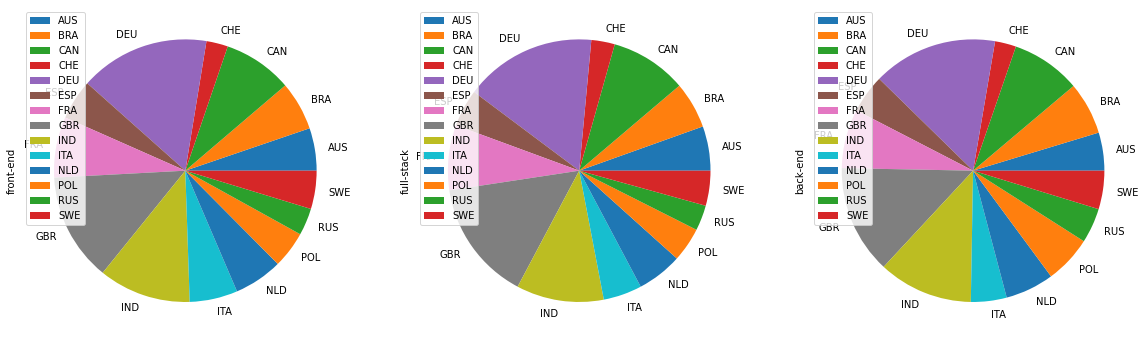

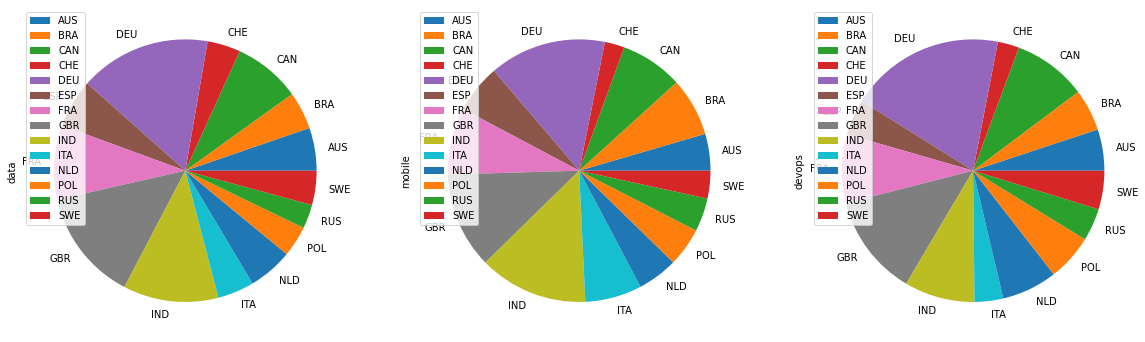

In [226]:
dev_type_list = ['front-end', 'full-stack', 'back-end', 'data', 'mobile', 'devops']

# subset the dataset to the top 15 countries in order for the plot to not be very cluttered
top_15_countries = df_common_survey.Country.value_counts().index[:15]
df_common_survey_top_15 = df_common_survey[df_common_survey['Country'].astype(str).isin(top_15_countries)]
# remove the United States from the dataset. It's clear that because it is formed of 50 states, it will represent the majority of developers
df_common_survey_top_15 = df_common_survey_top_15[df_common_survey_top_15.Country != 'USA']

# print regular country names for reference
for ct in top_15_countries:
    print(get_country_name(ct))


# create a pie plot for each dev type
df_common_survey_top_15.groupby('Country').sum()[dev_type_list[:3]].plot(subplots=True, kind="pie", figsize=(20, 15))
df_common_survey_top_15.groupby('Country').sum()[dev_type_list[3:6]].plot(subplots=True, kind="pie", figsize=(20, 15))

In [229]:
df_common_survey_top_15.groupby('Country').sum()[dev_type_list]

,front-end,full-stack,back-end,data,mobile,devops
Country,,,,,,
AUS,317,607,491,75,134,137
BRA,364,637,678,66,213,139
CAN,516,1047,897,118,228,245
CHE,161,321,273,58,72,71
DEU,969,1804,1610,230,426,516
ESP,300,512,496,85,177,119
FRA,453,890,763,130,244,228
GBR,807,1647,1403,196,351,337
IND,688,1196,1221,167,397,234


In [206]:
get_country_name('DEU'),get_country_name('GBR'),get_country_name('IND'),get_country_name('CAN'),get_country_name('FRA')

('Germany', 'United Kingdom', 'India', 'Canada', 'France')

## Question 2 - What is the difference in operating system adoption between years 2020 and 2021?

Being the primary parameter before buying a computer for each of our employees, we felt it's crucial to assess the trend in operating system adoption between 2020 and 2021.

From the bar chart below we notice that operation system adoption has stayed mainly the same with Windows slightly representing the majority. The only noticeable difference cand be seen in the Linux-based operation systems adoption being a little lower in 2021 compared to 2020.

<AxesSubplot:xlabel='Year'>

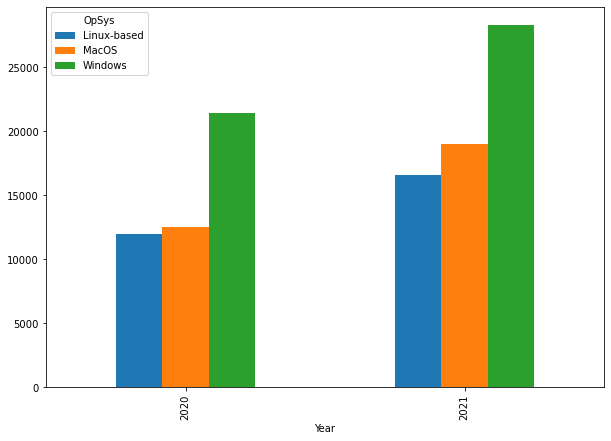

In [207]:
col_interest = ['OpSys', 'Year']
# extract only the main operating systems
opsys_interest = ['Linux-based', 'MacOS', 'Windows']
df_common_survey[col_interest][df_common_survey.OpSys.isin(opsys_interest)].pivot_table(index='Year', columns='OpSys', aggfunc=len).plot.bar(figsize=(10, 7))

In [208]:
# General percentage of adoption
total_opsys_reported = df_common_survey[df_common_survey.OpSys.isin(opsys_interest)][df_common_survey.Year == 2021].groupby(['OpSys']).count()['Year'].sum()
df_common_survey[df_common_survey.OpSys.isin(opsys_interest)][df_common_survey.Year == 2021].groupby(['OpSys']).count()['Year'] / total_opsys_reported

<ipython-input-208-17adb32501ba>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_opsys_reported = df_common_survey[df_common_survey.OpSys.isin(opsys_interest)][df_common_survey.Year == 2021].groupby(['OpSys']).count()['Year'].sum()
<ipython-input-208-17adb32501ba>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_common_survey[df_common_survey.OpSys.isin(opsys_interest)][df_common_survey.Year == 2021].groupby(['OpSys']).count()['Year'] / total_opsys_reported


OpSys
Linux-based    0.259453
MacOS          0.297545
Windows        0.443002
Name: Year, dtype: float64

## Question 3 - What are the estimated costs per year for our first teams of developers?

It is essential before proceeding with our recruitment campaign to see an estimated value for an initial team of senior developers and then add on to each team a junior to mid developer.

For this we first look to start each team with a lead senior developer. Later on we will look to add a set of junior to mid developers to each team once the bussiness expands.

In [209]:
columns_salary_interest = ['ConvertedCompYearly', 'front-end', 'full-stack', 'back-end', 'data', 'mobile', 'devops']

In [210]:
df_common_survey.dropna(subset=["ConvertedCompYearly"], inplace=True)
# we discard the rows where ConvertedCompYearly values are greater than 500.000 USD because it might be an error in our calculation or users' reporting and also because it's unlikely that our bussiness can afford even this maximum for one developer. Also we discard values lower than 18.000 USD for the same reason
df_common_survey = df_common_survey[(df_common_survey.ConvertedCompYearly < 500000) & (df_common_survey.ConvertedCompYearly > 18000)]

In [211]:
# subset dataset to only developers with more than 7 years of experience
df_senior = df_common_survey[df_common_survey.YearsCodePro > 7]
df_senior

,OpSys,YearsCodePro,CompTotal,CompFreq,ConvertedCompYearly,front-end,full-stack,back-end,data,mobile,devops,Country,Year
13,Linux-based,18,72000.0,Yearly,77831.0,1,1,1,0,0,0,DEU,2021
16,Linux-based,21,53000.0,Yearly,68507.0,0,0,1,0,0,0,GBR,2021
18,Linux-based,16,200000.0,Monthly,37752.0,0,1,1,0,0,0,RUS,2021
22,Windows,10,2000.0,Monthly,24000.0,0,1,0,0,1,1,UKR,2021
23,Linux-based,10,56000.0,Yearly,60535.0,0,1,1,0,0,0,DEU,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115475,NaN,14,13500.0,Monthly,162000.0,1,0,1,0,0,0,POL,2020
115581,Windows,10,6000.0,Monthly,72000.0,1,0,1,0,1,0,IND,2020
115634,NaN,9,8000.0,Monthly,96000.0,1,1,1,0,0,0,RUS,2020
115656,NaN,10,35000.0,Monthly,420000.0,0,1,0,1,0,0,ROU,2020


In [212]:
# subset senior developer dataframe to each dev type

df_senior_fe = df_senior[['ConvertedCompYearly', 'front-end']][df_senior['front-end'] != 0]
df_senior_fs = df_senior[['ConvertedCompYearly', 'full-stack']][df_senior['full-stack'] != 0]
df_junior_be = df_senior[['ConvertedCompYearly', 'back-end']][df_senior['back-end'] != 0]
df_senior_data = df_senior[['ConvertedCompYearly', 'data']][df_senior['data'] != 0]
df_senior_mob = df_senior[['ConvertedCompYearly', 'mobile']][df_senior['mobile'] != 0]
df_senior_ops = df_senior[['ConvertedCompYearly', 'devops']][df_senior['devops'] != 0]

In [213]:
# extract median senior developer salary for each dev type
median_senior_salaries = [df_senior_fe['ConvertedCompYearly'].median(), df_senior_fs['ConvertedCompYearly'].median(), df_junior_be['ConvertedCompYearly'].median(), df_senior_data['ConvertedCompYearly'].median(), df_senior_mob['ConvertedCompYearly'].median(), df_senior_ops['ConvertedCompYearly'].median()]

median_senior_salaries

[75000.0, 78000.0, 80000.0, 91128.0, 71138.5, 86316.0]

In [214]:
print("Estimated amount in USD needed per year for a team of senior developers: ", np.sum(median_senior_salaries))

Estimated amount in USD needed per year for a team of senior developers:  481582.5


In [215]:
# subset dataset to only developers which have between 1 and 5 years of experience
df_junior_mid = df_common_survey[(df_common_survey.YearsCodePro > 1) & (df_common_survey.YearsCodePro < 5)]
df_junior_mid

,OpSys,YearsCodePro,CompTotal,CompFreq,ConvertedCompYearly,front-end,full-stack,back-end,data,mobile,devops,Country,Year
4,Linux-based,4,42000.0,Monthly,51552.0,0,0,0,1,0,0,SWE,2021
12,Linux-based,2,36000.0,Yearly,38915.0,0,0,0,1,0,0,FRA,2021
19,MacOS,2,35000.0,Monthly,122580.0,0,0,1,0,0,0,ISR,2021
28,Windows,3,24000.0,Yearly,25944.0,0,0,0,0,0,0,FRA,2021
39,Linux-based,3,120000.0,Monthly,22644.0,0,1,0,1,0,0,RUS,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115635,Windows,3,15000.0,Monthly,180000.0,0,1,0,0,0,0,ZAF,2020
115685,MacOS,3,30000.0,Monthly,360000.0,0,1,0,0,0,0,SWE,2020
115709,NaN,3,10000.0,Monthly,120000.0,0,1,1,0,1,0,NaN,2020
115754,NaN,4,22000.0,Monthly,264000.0,1,0,0,0,0,0,FRA,2020


In [216]:
# subset junior developer dataframe to each dev type

df_junior_fe = df_junior_mid[['ConvertedCompYearly', 'front-end']][df_junior_mid['front-end'] != 0]
df_junior_fs = df_junior_mid[['ConvertedCompYearly', 'full-stack']][df_junior_mid['full-stack'] != 0]
df_junior_be = df_junior_mid[['ConvertedCompYearly', 'back-end']][df_junior_mid['back-end'] != 0]
df_junior_data = df_junior_mid[['ConvertedCompYearly', 'data']][df_junior_mid['data'] != 0]
df_junior_mob = df_junior_mid[['ConvertedCompYearly', 'mobile']][df_junior_mid['mobile'] != 0]
df_junior_ops = df_junior_mid[['ConvertedCompYearly', 'devops']][df_junior_mid['devops'] != 0]

In [217]:
# extract median junior developer salary for each dev type
median_junior_salaries = [df_junior_fe['ConvertedCompYearly'].median(), df_junior_fs['ConvertedCompYearly'].median(), df_junior_be['ConvertedCompYearly'].median(), df_junior_data['ConvertedCompYearly'].median(), df_junior_mob['ConvertedCompYearly'].median(), df_junior_ops['ConvertedCompYearly'].median()]

median_junior_salaries

[49293.0, 52518.0, 51888.0, 54169.0, 48464.0, 52942.0]

In [218]:
print("Estimated amount in USD needed per year for a team of junior to mid developers: ", np.sum(median_junior_salaries))
print("Estimated amount in USD needed per year for a team of junior to mid developers added to the amount needed for the initial team of senior developers: ", np.sum(median_junior_salaries) + np.sum(median_senior_salaries))

Estimated amount in USD needed per year for a team of junior to mid developers:  309274.0
Estimated amount in USD needed per year for a team of junior to mid developers added to the amount needed for the initial team of senior developers:  790856.5
